## __Prueba 7: LGBMClassifier con nueva estrategia de imputación__ ##

En esta prueba se retoma el modelo `LGBMClassifier`, el cual había mostrado el mejor desempeño en pruebas anteriores. Para evaluar posibles mejoras, se modificó la forma de imputar los valores faltantes en las variables categóricas. El objetivo es verificar si una nueva estrategia de imputación, aplicada de manera balanceada y equitativa, impacta positivamente en el rendimiento del modelo final.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## ANALÍSIS GENERAL ##   

In [2]:
df_train = pd.read_csv("../Datos/train.csv") #Cargado directamente desde archivos del pc, que está en una carpeta hermana
df_test = pd.read_csv("../Datos/test.csv")

In [3]:
df_train 

ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
0       904256    20212                           ENFERMERIA   
1       645256    20212                              DERECHO   
2       308367    20203                MERCADEO Y PUBLICIDAD   
3       470353    20195           ADMINISTRACION DE EMPRESAS   
4       989032    20212                           PSICOLOGIA   
...        ...      ...                                  ...   
692495   25096    20195                             BIOLOGIA   
692496  754213    20212                           PSICOLOGIA   
692497  504185    20183  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
692498  986620    20195                           PSICOLOGIA   
692499  933374    20195                           PSICOLOGIA   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                      BOGOTÁ  Entre 5.5 millones y menos de 7 millones   
1                   ATLANTICO  Entre 2.5 millones y menos de 4 millones   
2                      BOGOTÁ  Entre 2.5 millones y menos de 4 millones   
3                   SANTANDER  Entre 4 millones y menos de 5.5 millones   
4                   ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
...                       ...                                       ...   
692495             LA GUAJIRA         Entre 500 mil y menos de 1 millón   
692496        NORTE SANTANDER  Entre 2.5 millones y menos de 4 millones   
692497                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
692498                 TOLIMA  Entre 2.5 millones y menos de 4 millones   
692499              ANTIOQUIA  Entre 5.5 millones y menos de 7 millones   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0            Menos de 10 horas            Estrato 3                 Si   
1                            0            Estrato 3                 No   
2              Más de 30 horas            Estrato 3                 Si   
3                            0            Estrato 4                 Si   
4          Entre 21 y 30 horas            Estrato 3                 Si   
...                        ...                  ...                ...   
692495     Entre 11 y 20 horas            Estrato 2                 Si   
692496         Más de 30 horas            Estrato 3                 Si   
692497       Menos de 10 horas            Estrato 3                 Si   
692498       Menos de 10 horas            Estrato 1                 No   
692499         Más de 30 horas            Estrato 4                 Si   

                       FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  ...  \
0         Técnica o tecnológica incompleta                 Si  ...   
1           Técnica o tecnológica completa                 Si  ...   
2       Secundaria (Bachillerato) completa                 Si  ...   
3                                  No sabe                 Si  ...   
4                        Primaria completa                 Si  ...   
...                                    ...                ...  ...   
692495  Secundaria (Bachillerato) completa                 Si  ...   
692496                 Primaria incompleta                 Si  ...   
692497  Secundaria (Bachillerato) completa                 Si  ...   
692498                   Primaria completa                 No  ...   
692499  Secundaria (Bachillerato) completa                 Si  ...   

       ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                          N                       No                   Si   
1                          N                       No                   Si   
2                          N                       No                   No   
3                          N                       No                   Si   
4                          N                       No                   Si   
...                      ...                      ...                  ...   
692495                     N                       Si             

In [4]:
df_test

ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0       550236    20183                          TRABAJO SOCIAL   
1        98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2       499179    20212                  INGENIERIA MECATRONICA   
3       782980    20195                      CONTADURIA PUBLICA   
4       785185    20212              ADMINISTRACION DE EMPRESAS   
...        ...      ...                                     ...   
296781  496981    20195              ADMINISTRACION DE EMPRESAS   
296782  209415    20183                                 DERECHO   
296783  239074    20212                                 DERECHO   
296784  963852    20195                  INGENIERIA AERONAUTICA   
296785  792650    20212                   INGENIERIA INDUSTRIAL   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                     BOLIVAR                          Menos de 500 mil   
1                   ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                      BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
3                       SUCRE    Entre 1 millón y menos de 2.5 millones   
4                   ATLANTICO  Entre 2.5 millones y menos de 4 millones   
...                       ...                                       ...   
296781                 BOGOTÁ  Entre 2.5 millones y menos de 4 millones   
296782                   META    Entre 1 millón y menos de 2.5 millones   
296783                 BOGOTÁ  Entre 2.5 millones y menos de 4 millones   
296784              ANTIOQUIA  Entre 5.5 millones y menos de 7 millones   
296785                 BOYACA                         No pagó matrícula   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0            Menos de 10 horas            Estrato 3                 Si   
1          Entre 21 y 30 horas            Estrato 2                 Si   
2                            0            Estrato 3                 Si   
3          Entre 21 y 30 horas            Estrato 1                 No   
4          Entre 11 y 20 horas            Estrato 2                 Si   
...                        ...                  ...                ...   
296781         Más de 30 horas            Estrato 1                 Si   
296782                       0            Estrato 4                 Si   
296783         Más de 30 horas            Estrato 3                 Si   
296784     Entre 11 y 20 horas            Estrato 3                 Si   
296785                       0            Estrato 3                 Si   

                         FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0             Técnica o tecnológica completa                 Si   
1         Secundaria (Bachillerato) completa                 Si   
2       Secundaria (Bachillerato) incompleta                 Si   
3                        Primaria incompleta                 Si   
4         Secundaria (Bachillerato) completa                 Si   
...                                      ...                ...   
296781                   Primaria incompleta                 Si   
296782        Educación profesional completa                 Si   
296783    Secundaria (Bachillerato) completa                 Si   
296784        Educación profesional completa                 Si   
296785    Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                       No                     N                       Si   
1                       No                     N                       No   
2                       No                     N                       No   
3                       No                     N                       No   
4                       No                     N                       No   
...                    ...                   ...                      ...   
296781                  Si                     N                       Si

In [5]:
print(df_test.shape)
print(df_train.shape)
df_test.columns

(296786, 20)
(692500, 21)


Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'coef_1', 'coef_2',
       'coef_3', 'coef_4'],
      dtype='object')

## *Concateno ambos dataframes para aplicar la limpieza a todo* ##

In [6]:
df =  pd.concat([df_train, df_test], ignore_index=True)
d = df.copy()

In [7]:
d

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256    20212                  ENFERMERIA                 BOGOTÁ   
1       645256    20212                     DERECHO              ATLANTICO   
2       308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3       470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032    20212                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
989281  496981    20195  ADMINISTRACION DE EMPRESAS                 BOGOTÁ   
989282  209415    20183                     DERECHO                   META   
989283  239074    20212                     DERECHO                 BOGOTÁ   
989284  963852    20195      INGENIERIA AERONAUTICA              ANTIOQUIA   
989285  792650    20212       INGENIERIA INDUSTRIAL                 BOYACA   

                  ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0       Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1       Entre 2.5 millones y menos de 4 millones                       0   
2       Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3       Entre 4 millones y menos de 5.5 millones                       0   
4       Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   
...                                          ...                     ...   
989281  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
989282    Entre 1 millón y menos de 2.5 millones                       0   
989283  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
989284  Entre 5.5 millones y menos de 7 millones     Entre 11 y 20 horas   
989285                         No pagó matrícula                       0   

       FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0                 Estrato 3                 Si   
1                 Estrato 3                 No   
2                 Estrato 3                 Si   
3                 Estrato 4                 Si   
4                 Estrato 3                 Si   
...                     ...                ...   
989281            Estrato 1                 Si   
989282            Estrato 4                 Si   
989283            Estrato 3                 Si   
989284            Estrato 3                 Si   
989285            Estrato 3                 Si   

                       FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  ...  \
0         Técnica o tecnológica incompleta                 Si  ...   
1           Técnica o tecnológica completa                 Si  ...   
2       Secundaria (Bachillerato) completa                 Si  ...   
3                                  No sabe                 Si  ...   
4                        Primaria completa                 Si  ...   
...                                    ...                ...  ...   
989281                 Primaria incompleta                 Si  ...   
989282      Educación profesional completa                 Si  ...   
989283  Secundaria (Bachillerato) completa                 Si  ...   
989284      Educación profesional completa                 Si  ...   
989285  Secundaria (Bachillerato) completa                 Si  ...   

       ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                          N                       No                   Si   
1                          N                       No                   Si   
2                          N                       No                   No   
3                          N                       No                   Si   
4                          N                       No                   Si   
...                      ...                      ...                  ...   
989281                     N                       Si                   Si   
989282                     N                       No                   Si   
989283            

## Exploración del dataframe ##

In [8]:
d.columns #Ver columnas

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [9]:
d.shape #Dimensión

(989286, 21)

In [10]:
d.dtypes  #Tipos de datos en las columnas

ID                                  int64
PERIODO                             int64
ESTU_PRGM_ACADEMICO                object
ESTU_PRGM_DEPARTAMENTO             object
ESTU_VALORMATRICULAUNIVERSIDAD     object
ESTU_HORASSEMANATRABAJA            object
FAMI_ESTRATOVIVIENDA               object
FAMI_TIENEINTERNET                 object
FAMI_EDUCACIONPADRE                object
FAMI_TIENELAVADORA                 object
FAMI_TIENEAUTOMOVIL                object
ESTU_PRIVADO_LIBERTAD              object
ESTU_PAGOMATRICULAPROPIO           object
FAMI_TIENECOMPUTADOR               object
FAMI_TIENEINTERNET.1               object
FAMI_EDUCACIONMADRE                object
RENDIMIENTO_GLOBAL                 object
coef_1                            float64
coef_2                            float64
coef_3                            float64
coef_4                            float64
dtype: object

In [11]:
d.head(10) #Primeros 10 datos

ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
0  904256    20212                           ENFERMERIA   
1  645256    20212                              DERECHO   
2  308367    20203                MERCADEO Y PUBLICIDAD   
3  470353    20195           ADMINISTRACION DE EMPRESAS   
4  989032    20212                           PSICOLOGIA   
5  659872    20203                 MEDICINA VETERINARIA   
6   47159    20183                  INGENIERIA MECANICA   
7   11829    20183  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
8  257869    20212                INGENIERIA INDUSTRIAL   
9  465511    20183           ADMINISTRACION DE EMPRESAS   

  ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                 BOGOTÁ  Entre 5.5 millones y menos de 7 millones   
1              ATLANTICO  Entre 2.5 millones y menos de 4 millones   
2                 BOGOTÁ  Entre 2.5 millones y menos de 4 millones   
3              SANTANDER  Entre 4 millones y menos de 5.5 millones   
4              ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
5              ANTIOQUIA                         Más de 7 millones   
6                  HUILA  Entre 2.5 millones y menos de 4 millones   
7                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
8              ATLANTICO  Entre 5.5 millones y menos de 7 millones   
9              ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   

  ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0       Menos de 10 horas            Estrato 3                 Si   
1                       0            Estrato 3                 No   
2         Más de 30 horas            Estrato 3                 Si   
3                       0            Estrato 4                 Si   
4     Entre 21 y 30 horas            Estrato 3                 Si   
5       Menos de 10 horas            Estrato 5                 Si   
6     Entre 21 y 30 horas            Estrato 2                 Si   
7     Entre 11 y 20 horas            Estrato 2                 Si   
8       Menos de 10 horas            Estrato 1                 Si   
9         Más de 30 horas            Estrato 5                 Si   

                  FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  ...  \
0    Técnica o tecnológica incompleta                 Si  ...   
1      Técnica o tecnológica completa                 Si  ...   
2  Secundaria (Bachillerato) completa                 Si  ...   
3                             No sabe                 Si  ...   
4                   Primaria completa                 Si  ...   
5      Educación profesional completa                 Si  ...   
6    Educación profesional incompleta                 Si  ...   
7                 Primaria incompleta                 Si  ...   
8  Secundaria (Bachillerato) completa                 Si  ...   
9                           Postgrado                 Si  ...   

  ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                     N                       No                   Si   
1                     N                       No                   Si   
2                     N                       No                   No   
3                     N                       No                   Si   
4                     N                       No                   Si   
5                     N                       No                   Si   
6                     N                       Si                   Si   
7                     N                       Si                   No   
8                     N                       Si                   Si   
9                     N                       Si                   Si   

  FAMI_TIENEINTERNET.1                   FAMI_EDUCACIONMADRE  \
0                   Si                             Postgrado   
1                   No      Técnica o tecnológica incompleta   
2                   Si    Secundaria (Bachillerato) completa   
3                   Si    Secundaria (Bachillerato

In [12]:
d.tail(10) #Últimos 10 datos

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
989276  718143    20203       INGENIERIA INDUSTRIAL                BOLIVAR   
989277  516832    20195                    MERCADEO              ANTIOQUIA   
989278  438542    20183        INGENIERIA AMBIENTAL                 BOGOTÁ   
989279  977130    20212  ADMINISTRACIÓN DE EMPRESAS                 BOGOTÁ   
989280  229699    20195          CONTADURÍA PÚBLICA                 BOGOTÁ   
989281  496981    20195  ADMINISTRACION DE EMPRESAS                 BOGOTÁ   
989282  209415    20183                     DERECHO                   META   
989283  239074    20212                     DERECHO                 BOGOTÁ   
989284  963852    20195      INGENIERIA AERONAUTICA              ANTIOQUIA   
989285  792650    20212       INGENIERIA INDUSTRIAL                 BOYACA   

                  ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
989276    Entre 1 millón y menos de 2.5 millones                       0   
989277                         Más de 7 millones         Más de 30 horas   
989278  Entre 5.5 millones y menos de 7 millones     Entre 11 y 20 horas   
989279    Entre 1 millón y menos de 2.5 millones         Más de 30 horas   
989280    Entre 1 millón y menos de 2.5 millones       Menos de 10 horas   
989281  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
989282    Entre 1 millón y menos de 2.5 millones                       0   
989283  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
989284  Entre 5.5 millones y menos de 7 millones     Entre 11 y 20 horas   
989285                         No pagó matrícula                       0   

       FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
989276            Estrato 2                 Si   
989277            Estrato 6                 Si   
989278            Estrato 5                NaN   
989279            Estrato 3                 Si   
989280            Estrato 2                 Si   
989281            Estrato 1                 Si   
989282            Estrato 4                 Si   
989283            Estrato 3                 Si   
989284            Estrato 3                 Si   
989285            Estrato 3                 Si   

                         FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  ...  \
989276        Educación profesional completa                 Si  ...   
989277  Secundaria (Bachillerato) incompleta                 Si  ...   
989278        Educación profesional completa                 Si  ...   
989279                   Primaria incompleta                 Si  ...   
989280                               Ninguno                 Si  ...   
989281                   Primaria incompleta                 Si  ...   
989282        Educación profesional completa                 Si  ...   
989283    Secundaria (Bachillerato) completa                 Si  ...   
989284        Educación profesional completa                 Si  ...   
989285    Secundaria (Bachillerato) completa                 Si  ...   

       ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
989276                     N                       No                   Si   
989277                     N                       No                   Si   
989278                     N                       No                   Si   
989279                     N                       Si                   Si   
989280                     N                       No                   Si   
989281                     N                       Si                   Si   
989282                     N                       No                   Si   
989283                     N                       No                   Si   
989284                     N                       No                   Si   
989285                     N                       No                   Si   

       FAMI_TIENEINTERNET.1                 FAMI_EDUCACIONMADRE  \
989276                   Si      Educación pro

In [13]:
d.describe() #Estadísticas descripticas de columnas numéricas

ID        PERIODO         coef_1         coef_2  \
count  989286.00000  989286.000000  989286.000000  989286.000000   
mean   494643.50000   20198.370398       0.268511       0.259994   
std    285582.41354      10.532246       0.121897       0.093816   
min         1.00000   20183.000000       0.000000       0.000000   
25%    247322.25000   20195.000000       0.204000       0.213000   
50%    494643.50000   20195.000000       0.241000       0.269000   
75%    741964.75000   20203.000000       0.313000       0.308000   
max    989286.00000   20213.000000       0.663000       0.487000   

              coef_3         coef_4  
count  989286.000000  989286.000000  
mean        0.262317       0.262767  
std         0.059096       0.067837  
min         0.000000       0.000000  
25%         0.254000       0.255000  
50%         0.277000       0.284000  
75%         0.294000       0.302000  
max         0.322000       0.332000

In [14]:
#Conteo de valores nulos por columna
d.isna().sum() 

ID                                     0
PERIODO                                0
ESTU_PRGM_ACADEMICO                    0
ESTU_PRGM_DEPARTAMENTO                 0
ESTU_VALORMATRICULAUNIVERSIDAD      9010
ESTU_HORASSEMANATRABAJA            44236
FAMI_ESTRATOVIVIENDA               45932
FAMI_TIENEINTERNET                 38168
FAMI_EDUCACIONPADRE                33171
FAMI_TIENELAVADORA                 57032
FAMI_TIENEAUTOMOVIL                62541
ESTU_PRIVADO_LIBERTAD                  0
ESTU_PAGOMATRICULAPROPIO            9305
FAMI_TIENECOMPUTADOR               54542
FAMI_TIENEINTERNET.1               38168
FAMI_EDUCACIONMADRE                33887
RENDIMIENTO_GLOBAL                296786
coef_1                                 0
coef_2                                 0
coef_3                                 0
coef_4                                 0
dtype: int64

### Clasificación de columnas no numéricas ###

En esta parte:

- Se explora las columnas que las variables no son de tipo numéricas

- Se conocen los valores únicos de cada columna categórica

- Se hace gráfico de frecuencia para columnas categóricas 

In [15]:
#Obtener datos con valores numéricos
numeric_data = d._get_numeric_data()
numeric_data

ID  PERIODO  coef_1  coef_2  coef_3  coef_4
0       904256    20212   0.322   0.208   0.310   0.267
1       645256    20212   0.311   0.215   0.292   0.264
2       308367    20203   0.297   0.214   0.305   0.264
3       470353    20195   0.485   0.172   0.252   0.190
4       989032    20212   0.316   0.232   0.285   0.294
...        ...      ...     ...     ...     ...     ...
989281  496981    20195   0.168   0.410   0.235   0.300
989282  209415    20183   0.471   0.184   0.264   0.193
989283  239074    20212   0.292   0.249   0.276   0.256
989284  963852    20195   0.305   0.219   0.310   0.260
989285  792650    20212   0.305   0.245   0.277   0.270

[989286 rows x 6 columns]

In [16]:
categorical_col =  [i for i in d.columns if not i in numeric_data]
categorical_col

['ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET.1',
 'FAMI_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL']

In [17]:
import numpy as np
dic = {}  
for col in categorical_col:
    dic[col] = list((np.unique(d[col].dropna()))) #CONOCER VALORES UNICOS DE COLS CATEGORICAS MEDIANTE SU NOMBRE


In [18]:
for i in categorical_col:
    print(i , d[i].value_counts())

ESTU_PRGM_ACADEMICO ESTU_PRGM_ACADEMICO
DERECHO                                                                                                 76228
ADMINISTRACION DE EMPRESAS                                                                              74200
CONTADURIA PUBLICA                                                                                      56525
PSICOLOGIA                                                                                              45750
INGENIERIA INDUSTRIAL                                                                                   40997
                                                                                                        ...  
ADMINISTRACION  DE EMPRESAS.                                                                                1
LICENC.EN EDUCACION BASICA PRIMARIA ENF.EN CIENCIAS NATURALESEDUC.AMBIENTAL MATEMA.LENGUA CASTELLANA        1
ADMINISTRACION DE EMPRESAS.                                                     

### Gráfica de frecuencias en cada columna ###

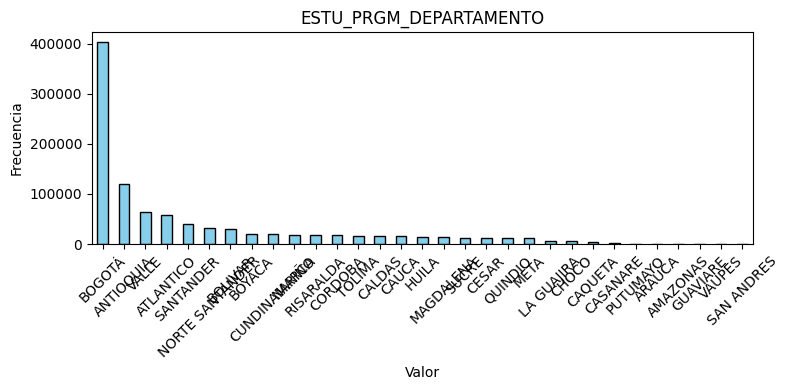

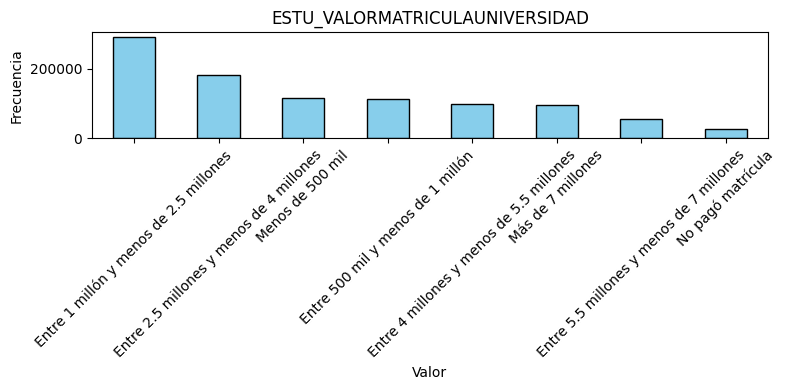

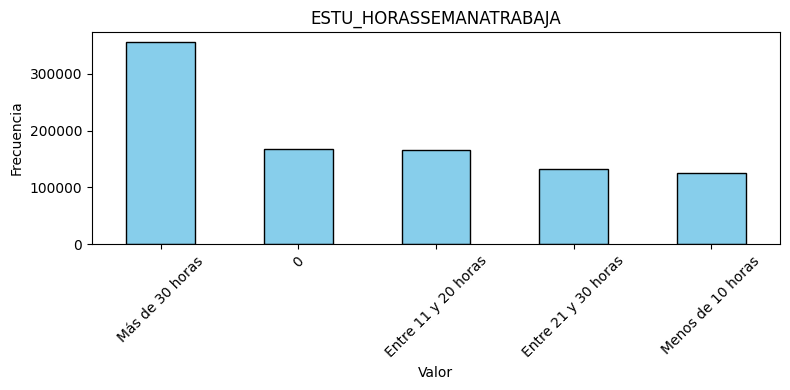

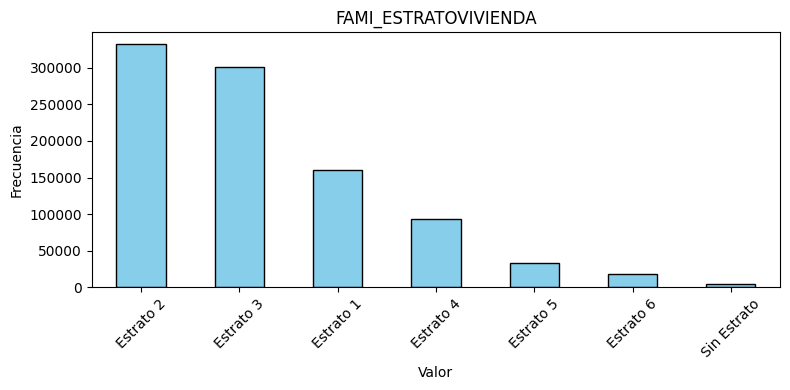

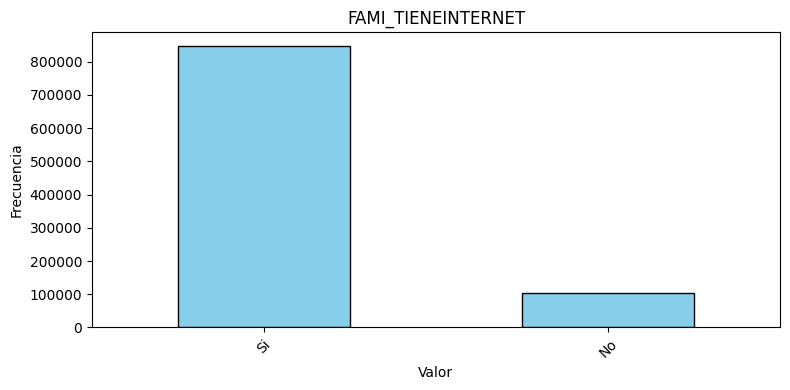

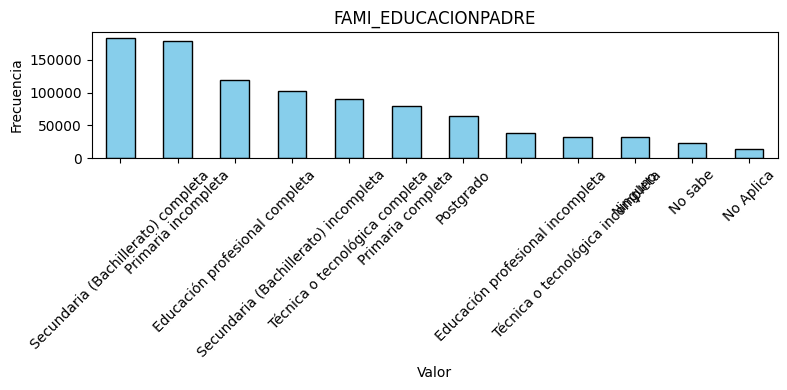

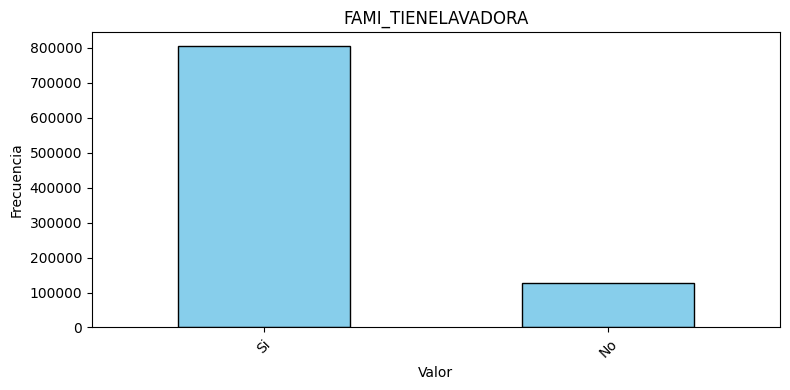

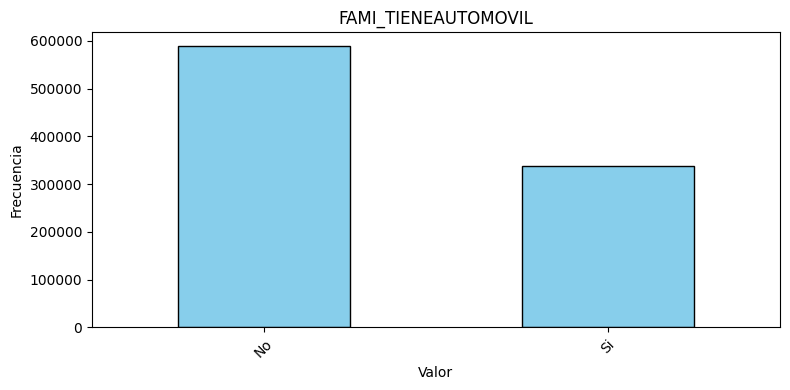

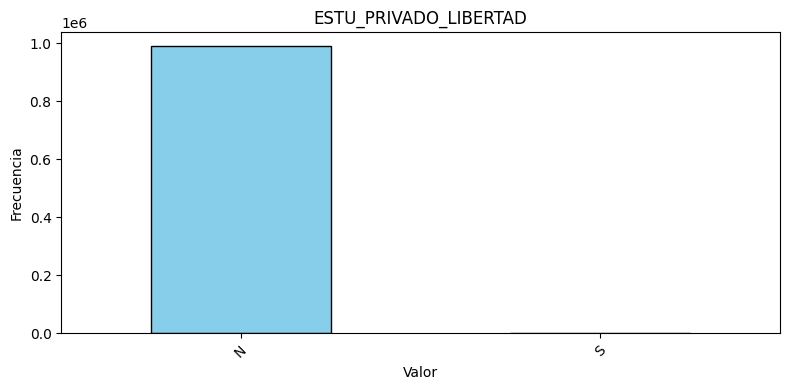

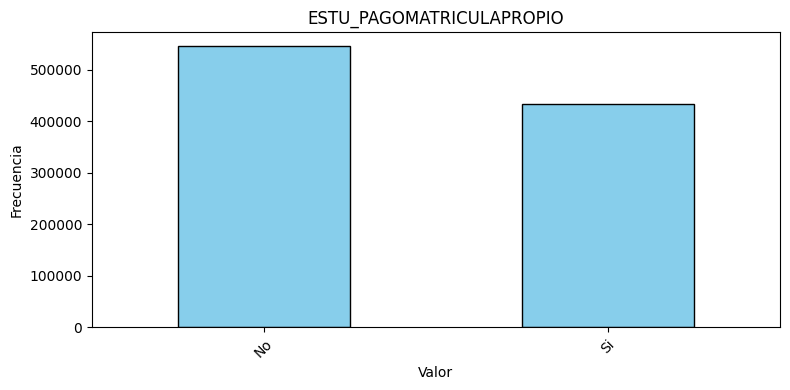

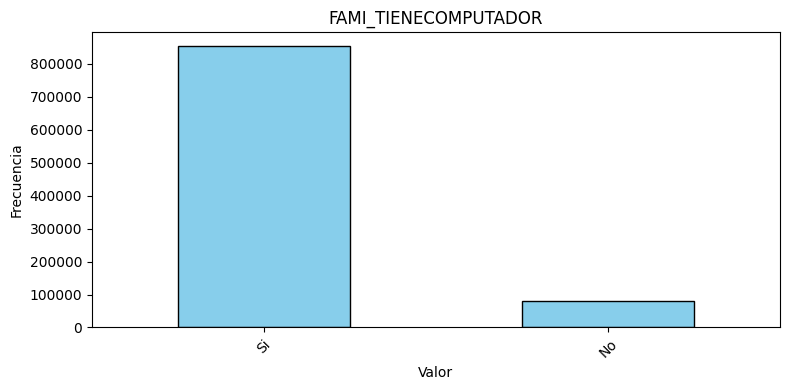

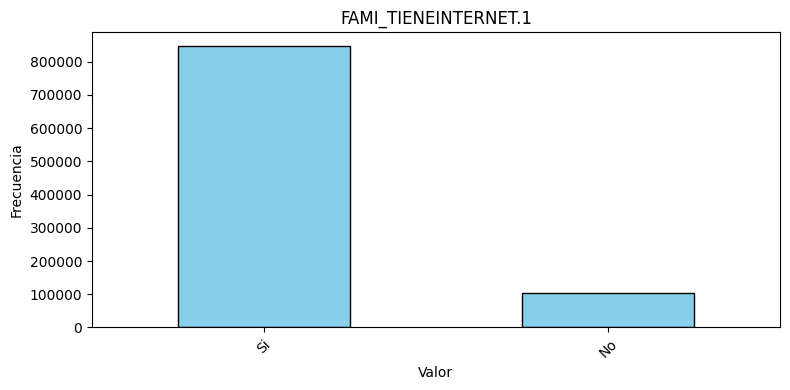

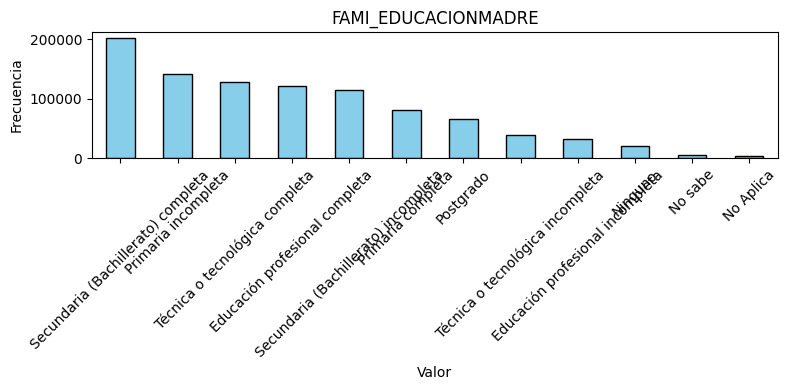

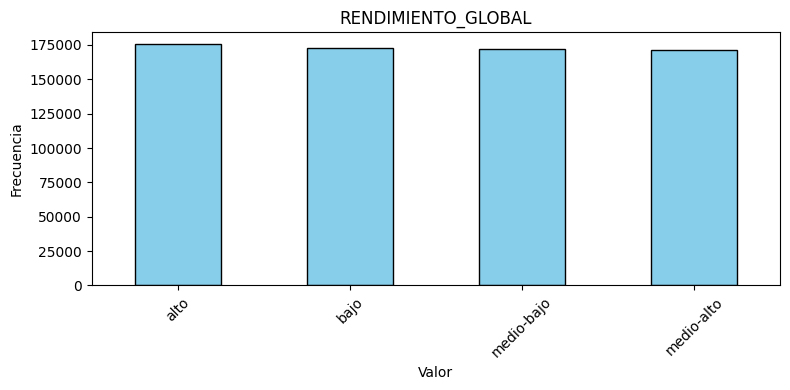

In [19]:
for col in categorical_col[1:]:
    valores = d[col].dropna() 
    conteo = valores.value_counts() 

    plt.figure(figsize=(8, 4))
    conteo.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## PREPROCESADO DE LOS DATOS ##

#### Quitar tíldes a variables ####
Esto con la finalidad de que más adelante no se repitan variables del mismo tipo y se tomen por separado 

In [20]:
import unicodedata

# Función para quitar tildes
def quitar_tildes(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize('NFD', texto)
        texto = ''.join([c for c in texto if unicodedata.category(c) != 'Mn'])
    return texto



In [21]:
d[categorical_col] = d[categorical_col].applymap(quitar_tildes)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12360\1093102503.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d[categorical_col] = d[categorical_col].applymap(quitar_tildes)


Se elimina ESTU_PRIVADO_LIBERTAD ya que no es una variable que me brinde información

In [22]:
d.drop('ESTU_PRIVADO_LIBERTAD', axis=1, inplace=True)
d

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256    20212                  ENFERMERIA                 BOGOTA   
1       645256    20212                     DERECHO              ATLANTICO   
2       308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTA   
3       470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032    20212                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
989281  496981    20195  ADMINISTRACION DE EMPRESAS                 BOGOTA   
989282  209415    20183                     DERECHO                   META   
989283  239074    20212                     DERECHO                 BOGOTA   
989284  963852    20195      INGENIERIA AERONAUTICA              ANTIOQUIA   
989285  792650    20212       INGENIERIA INDUSTRIAL                 BOYACA   

                  ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0       Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1       Entre 2.5 millones y menos de 4 millones                       0   
2       Entre 2.5 millones y menos de 4 millones         Mas de 30 horas   
3       Entre 4 millones y menos de 5.5 millones                       0   
4       Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   
...                                          ...                     ...   
989281  Entre 2.5 millones y menos de 4 millones         Mas de 30 horas   
989282    Entre 1 millon y menos de 2.5 millones                       0   
989283  Entre 2.5 millones y menos de 4 millones         Mas de 30 horas   
989284  Entre 5.5 millones y menos de 7 millones     Entre 11 y 20 horas   
989285                         No pago matricula                       0   

       FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0                 Estrato 3                 Si   
1                 Estrato 3                 No   
2                 Estrato 3                 Si   
3                 Estrato 4                 Si   
4                 Estrato 3                 Si   
...                     ...                ...   
989281            Estrato 1                 Si   
989282            Estrato 4                 Si   
989283            Estrato 3                 Si   
989284            Estrato 3                 Si   
989285            Estrato 3                 Si   

                       FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0         Tecnica o tecnologica incompleta                 Si   
1           Tecnica o tecnologica completa                 Si   
2       Secundaria (Bachillerato) completa                 Si   
3                                  No sabe                 Si   
4                        Primaria completa                 Si   
...                                    ...                ...   
989281                 Primaria incompleta                 Si   
989282      Educacion profesional completa                 Si   
989283  Secundaria (Bachillerato) completa                 Si   
989284      Educacion profesional completa                 Si   
989285  Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                       Si                       No                   Si   
1                       No                       No                   Si   
2                       No                       No                   No   
3                       No                       No                   Si   
4                       Si                       No                   Si   
...                    ...                      ...                  ...   
989281                  Si                       Si                   Si   
989282                  No                       No                   Si   
989283                  No                       No                   Si   
989284              

#### Columnas de rangos en un valor ####

ESTU_VALORMATRICULAUNIVERSIDAD -> paso de rangos a la mitad del rango

ESTU_HORASSEMANATRABAJA -> paso de rangos a la mitad del rango

FAMI_ESTRATOVIVIENDA -> Valor numerico (Estrato 1 = 1)

In [23]:
rango_ingresos = {
    'Menos de 500 mil': 0.25,  # millones
    'Entre 500 mil y menos de 1 millon': 0.75,
    'Entre 1 millon y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'Mas de 7 millones': 8.0,  # puedes estimar un valor promedio superior
    'No pago matricula': 0.0,  # si lo interpretas como costo cero
}
d['ESTU_VALORMATRICULAUNIVERSIDAD'] = d['ESTU_VALORMATRICULAUNIVERSIDAD'].map(rango_ingresos)


In [24]:
rango_horas = {
    '0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15.5,
    'Entre 21 y 30 horas': 25.5,
    'Mas de 30 horas': 35,  # posibilidad de ajuste
}
d['ESTU_HORASSEMANATRABAJA'] = d['ESTU_HORASSEMANATRABAJA'].map(rango_horas)


In [25]:
estrato_map = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0  # o puedes usar -1 o np.nan si prefieres distinguirlo
}
d['FAMI_ESTRATOVIVIENDA'] = d['FAMI_ESTRATOVIVIENDA'].map(estrato_map)


In [26]:
d

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256    20212                  ENFERMERIA                 BOGOTA   
1       645256    20212                     DERECHO              ATLANTICO   
2       308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTA   
3       470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032    20212                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
989281  496981    20195  ADMINISTRACION DE EMPRESAS                 BOGOTA   
989282  209415    20183                     DERECHO                   META   
989283  239074    20212                     DERECHO                 BOGOTA   
989284  963852    20195      INGENIERIA AERONAUTICA              ANTIOQUIA   
989285  792650    20212       INGENIERIA INDUSTRIAL                 BOYACA   

        ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                                 6.25                      5.0   
1                                 3.25                      0.0   
2                                 3.25                     35.0   
3                                 4.75                      0.0   
4                                 3.25                     25.5   
...                                ...                      ...   
989281                            3.25                     35.0   
989282                            1.75                      0.0   
989283                            3.25                     35.0   
989284                            6.25                     15.5   
989285                            0.00                      0.0   

        FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0                        3.0                 Si   
1                        3.0                 No   
2                        3.0                 Si   
3                        4.0                 Si   
4                        3.0                 Si   
...                      ...                ...   
989281                   1.0                 Si   
989282                   4.0                 Si   
989283                   3.0                 Si   
989284                   3.0                 Si   
989285                   3.0                 Si   

                       FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0         Tecnica o tecnologica incompleta                 Si   
1           Tecnica o tecnologica completa                 Si   
2       Secundaria (Bachillerato) completa                 Si   
3                                  No sabe                 Si   
4                        Primaria completa                 Si   
...                                    ...                ...   
989281                 Primaria incompleta                 Si   
989282      Educacion profesional completa                 Si   
989283  Secundaria (Bachillerato) completa                 Si   
989284      Educacion profesional completa                 Si   
989285  Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PAGOMATRICULAPROPIO FAMI_TIENECOMPUTADOR  \
0                       Si                       No                   Si   
1                       No                       No                   Si   
2                       No                       No                   No   
3                       No                       No                   Si   
4                       Si                       No                   Si   
...                    ...                      ...                  ...   
989281                  Si                       Si                   Si   
989282                  No                       No                   Si   
989283                  No                       No                   Si   
989284                  No                       No                   Si   
989285                  Si              

### Conversión de variables categóricas a formato numérico ###

Se cambia la columna FAMI_EDUCACIONMADRE y FAMI_EDUCACIONPADRE por label encoding, ya que tiene un 'orden' se aplica esto.

Para 'No Aplica', 'No sabe' se cambio por NaN

In [27]:
nivel_educativo_map = {
    'Ninguno': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Tecnica o tecnologica incompleta': 5,
    'Tecnica o tecnologica completa': 6,
    'Educacion profesional incompleta': 7,
    'Educacion profesional completa': 8,
    'Postgrado': 9
}


In [28]:
#Se cambia para la variable FAMI_EDUCACIONMADRE
d['FAMI_EDUCACIONMADRE'] = d["FAMI_EDUCACIONMADRE"].map(nivel_educativo_map)

d['FAMI_EDUCACIONMADRE'] = d['FAMI_EDUCACIONMADRE'].replace(['No Aplica', 'No sabe'], np.nan)

#Se cambia para la variable FAMI_EDUCACIONPADRE
d['FAMI_EDUCACIONPADRE'] = d["FAMI_EDUCACIONPADRE"].map(nivel_educativo_map)

d['FAMI_EDUCACIONPADRE'] = d['FAMI_EDUCACIONPADRE'].replace(['No Aplica', 'No sabe'], np.nan)
d

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256    20212                  ENFERMERIA                 BOGOTA   
1       645256    20212                     DERECHO              ATLANTICO   
2       308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTA   
3       470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032    20212                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
989281  496981    20195  ADMINISTRACION DE EMPRESAS                 BOGOTA   
989282  209415    20183                     DERECHO                   META   
989283  239074    20212                     DERECHO                 BOGOTA   
989284  963852    20195      INGENIERIA AERONAUTICA              ANTIOQUIA   
989285  792650    20212       INGENIERIA INDUSTRIAL                 BOYACA   

        ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                                 6.25                      5.0   
1                                 3.25                      0.0   
2                                 3.25                     35.0   
3                                 4.75                      0.0   
4                                 3.25                     25.5   
...                                ...                      ...   
989281                            3.25                     35.0   
989282                            1.75                      0.0   
989283                            3.25                     35.0   
989284                            6.25                     15.5   
989285                            0.00                      0.0   

        FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                        3.0                 Si                  5.0   
1                        3.0                 No                  6.0   
2                        3.0                 Si                  4.0   
3                        4.0                 Si                  NaN   
4                        3.0                 Si                  2.0   
...                      ...                ...                  ...   
989281                   1.0                 Si                  1.0   
989282                   4.0                 Si                  8.0   
989283                   3.0                 Si                  4.0   
989284                   3.0                 Si                  8.0   
989285                   3.0                 Si                  4.0   

       FAMI_TIENELAVADORA FAMI_TIENEAUTOMOVIL ESTU_PAGOMATRICULAPROPIO  \
0                      Si                  Si                       No   
1                      Si                  No                       No   
2                      Si                  No                       No   
3                      Si                  No                       No   
4                      Si                  Si                       No   
...                   ...                 ...                      ...   
989281                 Si                  Si                       Si   
989282                 Si                  No                       No   
989283                 Si                  No                       No   
989284                 Si                  No                       No   
989285                 Si                  Si                       No   

       FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET.1  FAMI_EDUCACIONMADRE  \
0                        Si                   Si                  9.0   
1                        Si                   No                  5.0   
2                        No                   Si                  4.0   
3                        Si                   Si                  4.0   
4                        Si                   Si                  2.0   
...                     ...                  ...                  ...   
98928

Se cambia la columna de RENDIMIENTO_GLOBAL por tipo numérica con label encoding 

In [29]:
orden = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
d['RENDIMIENTO_GLOBAL'] = d['RENDIMIENTO_GLOBAL'].map(orden)

In [30]:
#Se identifica que una columna está repetida
np.all(d["FAMI_TIENEINTERNET.1"]) == np.all(d["FAMI_TIENEINTERNET"]) 

np.True_

In [31]:
#Se elimina ya que está repetida 
d.drop("FAMI_TIENEINTERNET.1", axis=1, inplace=True)
d.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO',
       'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [32]:
d

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256    20212                  ENFERMERIA                 BOGOTA   
1       645256    20212                     DERECHO              ATLANTICO   
2       308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTA   
3       470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032    20212                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
989281  496981    20195  ADMINISTRACION DE EMPRESAS                 BOGOTA   
989282  209415    20183                     DERECHO                   META   
989283  239074    20212                     DERECHO                 BOGOTA   
989284  963852    20195      INGENIERIA AERONAUTICA              ANTIOQUIA   
989285  792650    20212       INGENIERIA INDUSTRIAL                 BOYACA   

        ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                                 6.25                      5.0   
1                                 3.25                      0.0   
2                                 3.25                     35.0   
3                                 4.75                      0.0   
4                                 3.25                     25.5   
...                                ...                      ...   
989281                            3.25                     35.0   
989282                            1.75                      0.0   
989283                            3.25                     35.0   
989284                            6.25                     15.5   
989285                            0.00                      0.0   

        FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                        3.0                 Si                  5.0   
1                        3.0                 No                  6.0   
2                        3.0                 Si                  4.0   
3                        4.0                 Si                  NaN   
4                        3.0                 Si                  2.0   
...                      ...                ...                  ...   
989281                   1.0                 Si                  1.0   
989282                   4.0                 Si                  8.0   
989283                   3.0                 Si                  4.0   
989284                   3.0                 Si                  8.0   
989285                   3.0                 Si                  4.0   

       FAMI_TIENELAVADORA FAMI_TIENEAUTOMOVIL ESTU_PAGOMATRICULAPROPIO  \
0                      Si                  Si                       No   
1                      Si                  No                       No   
2                      Si                  No                       No   
3                      Si                  No                       No   
4                      Si                  Si                       No   
...                   ...                 ...                      ...   
989281                 Si                  Si                       Si   
989282                 Si                  No                       No   
989283                 Si                  No                       No   
989284                 Si                  No                       No   
989285                 Si                  Si                       No   

       FAMI_TIENECOMPUTADOR  FAMI_EDUCACIONMADRE  RENDIMIENTO_GLOBAL  coef_1  \
0                        Si                  9.0                 2.0   0.322   
1                        Si                  5.0                 0.0   0.311   
2                        No                  4.0                 0.0   0.297   
3                        Si                  4.0                 3.0   0.485   
4                        Si                  2.0                 1.0   0.316   
...                     ...         

In [33]:
#Se selecciona columnas que se tienen en tipo objet (Si - No), para pasarlas en 1 ó 0
cols_object = d.select_dtypes(include='object').columns
cols_bool = cols_object.delete(5)
cols_bool = cols_bool[2:]
cols_bool

Index(['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENECOMPUTADOR'],
      dtype='object')

In [34]:
d['ESTU_PAGOMATRICULAPROPIO'] = d['ESTU_PAGOMATRICULAPROPIO'].map({'Si': 1, 'No': 0})

In [35]:
for i in cols_bool:
    d[str(i)] = d[str(i)].map({'Si': 1, 'No': 0})
d.dtypes

ID                                  int64
PERIODO                             int64
ESTU_PRGM_ACADEMICO                object
ESTU_PRGM_DEPARTAMENTO             object
ESTU_VALORMATRICULAUNIVERSIDAD    float64
ESTU_HORASSEMANATRABAJA           float64
FAMI_ESTRATOVIVIENDA              float64
FAMI_TIENEINTERNET                float64
FAMI_EDUCACIONPADRE               float64
FAMI_TIENELAVADORA                float64
FAMI_TIENEAUTOMOVIL               float64
ESTU_PAGOMATRICULAPROPIO          float64
FAMI_TIENECOMPUTADOR              float64
FAMI_EDUCACIONMADRE               float64
RENDIMIENTO_GLOBAL                float64
coef_1                            float64
coef_2                            float64
coef_3                            float64
coef_4                            float64
dtype: object

In [36]:
d

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256    20212                  ENFERMERIA                 BOGOTA   
1       645256    20212                     DERECHO              ATLANTICO   
2       308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTA   
3       470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032    20212                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
989281  496981    20195  ADMINISTRACION DE EMPRESAS                 BOGOTA   
989282  209415    20183                     DERECHO                   META   
989283  239074    20212                     DERECHO                 BOGOTA   
989284  963852    20195      INGENIERIA AERONAUTICA              ANTIOQUIA   
989285  792650    20212       INGENIERIA INDUSTRIAL                 BOYACA   

        ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                                 6.25                      5.0   
1                                 3.25                      0.0   
2                                 3.25                     35.0   
3                                 4.75                      0.0   
4                                 3.25                     25.5   
...                                ...                      ...   
989281                            3.25                     35.0   
989282                            1.75                      0.0   
989283                            3.25                     35.0   
989284                            6.25                     15.5   
989285                            0.00                      0.0   

        FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                        3.0                 1.0                  5.0   
1                        3.0                 0.0                  6.0   
2                        3.0                 1.0                  4.0   
3                        4.0                 1.0                  NaN   
4                        3.0                 1.0                  2.0   
...                      ...                 ...                  ...   
989281                   1.0                 1.0                  1.0   
989282                   4.0                 1.0                  8.0   
989283                   3.0                 1.0                  4.0   
989284                   3.0                 1.0                  8.0   
989285                   3.0                 1.0                  4.0   

        FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  ESTU_PAGOMATRICULAPROPIO  \
0                      1.0                  1.0                       0.0   
1                      1.0                  0.0                       0.0   
2                      1.0                  0.0                       0.0   
3                      1.0                  0.0                       0.0   
4                      1.0                  1.0                       0.0   
...                    ...                  ...                       ...   
989281                 1.0                  1.0                       1.0   
989282                 1.0                  0.0                       0.0   
989283                 1.0                  0.0                       0.0   
989284                 1.0                  0.0                       0.0   
989285                 1.0                  1.0                       0.0   

        FAMI_TIENECOMPUTADOR  FAMI_EDUCACIONMADRE  RENDIMIENTO_GLOBAL  coef_1  \
0                        1.0                  9.0                 2.0   0.322   
1                        1.0                  5.0                 0.0   0.311   
2                        0.0                  4.0                 0.0   0.297   
3                        1.0                  4.0                 3.0   0.485   
4                        1.0                  2.0              

## Análisis datos faltantes NaN ##

In [37]:
d.isna().sum()

ID                                     0
PERIODO                                0
ESTU_PRGM_ACADEMICO                    0
ESTU_PRGM_DEPARTAMENTO                 0
ESTU_VALORMATRICULAUNIVERSIDAD      9010
ESTU_HORASSEMANATRABAJA            44236
FAMI_ESTRATOVIVIENDA               45932
FAMI_TIENEINTERNET                 38168
FAMI_EDUCACIONPADRE                70013
FAMI_TIENELAVADORA                 57032
FAMI_TIENEAUTOMOVIL                62541
ESTU_PAGOMATRICULAPROPIO            9305
FAMI_TIENECOMPUTADOR               54542
FAMI_EDUCACIONMADRE                40893
RENDIMIENTO_GLOBAL                296786
coef_1                                 0
coef_2                                 0
coef_3                                 0
coef_4                                 0
dtype: int64

In [38]:
#Función para comparar variables con datos faltantes con respecto 
# a los que tienen información de manera gráfica 
def plot_nan_vs_notnull_individual(df):
    total_rows = len(df)

    for col in df.columns:
        n_nan = df[col].isnull().sum()
        if n_nan == 0:
            continue  # saltar columnas sin NaN
        
        n_notnull = total_rows - n_nan
        
        # Crear gráfico
        plt.figure(figsize=(4, 5))
        plt.bar(['Con dato', 'Faltante'], [n_notnull, n_nan], color=['skyblue', 'salmon'])
        plt.title(f'{col} ({(n_nan/total_rows)*100:.1f}% faltantes)')
        plt.ylabel('Cantidad de filas')
        plt.tight_layout()
        plt.show()

In [39]:
#Matriz para visualizar datos faltantes en todo el dataframe
def plot_missing_matrix(df):
    """
    Visualiza los valores faltantes en un DataFrame como una matriz,
    donde los valores faltantes se ven blancos y los presentes se ven negros.
    """
    fig, ax = plt.subplots(figsize=(18, 12))
    
    # Creamos la matriz: 1 si el valor está presente, 0 si falta
    not_missing = (~df.isna()).values.astype(int)
    
    # Visualizamos: 1 (presente) = negro, 0 (faltante) = blanco
    ax.imshow(not_missing.T, cmap='binary', aspect='auto', interpolation='none')
    
    # Etiquetas de columnas
    ax.set_yticks(np.arange(df.shape[1]))
    ax.set_yticklabels(df.columns)
    
    # Etiquetas de filas espaciadas
    ax.set_xticks(np.linspace(0, df.shape[0], 10))
    ax.set_xlabel("Número de fila")
    ax.set_title("Matriz de valores faltantes (blanco = falta, negro = presente)")

    plt.tight_layout()
    plt.show()

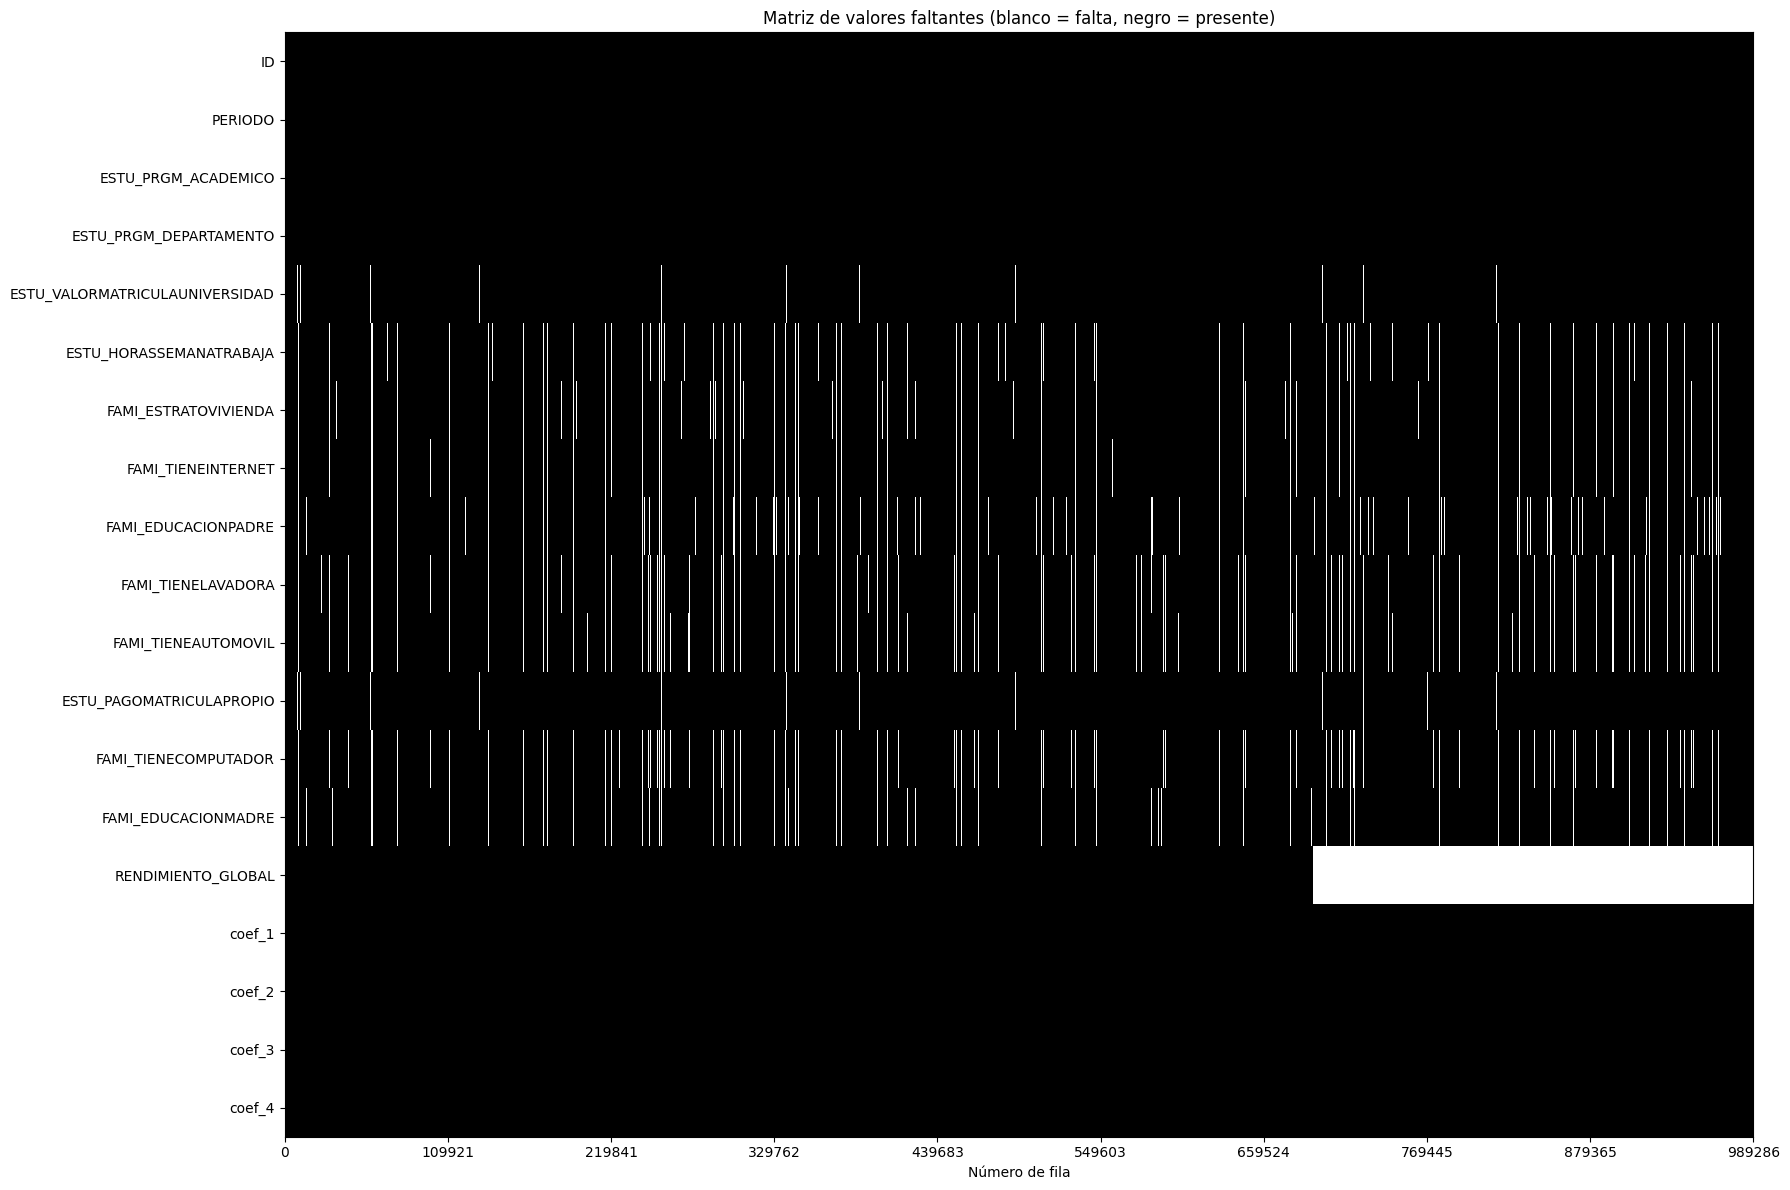

In [40]:
plot_missing_matrix(d)

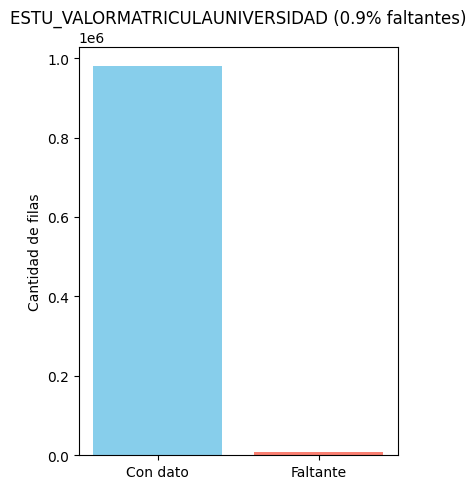

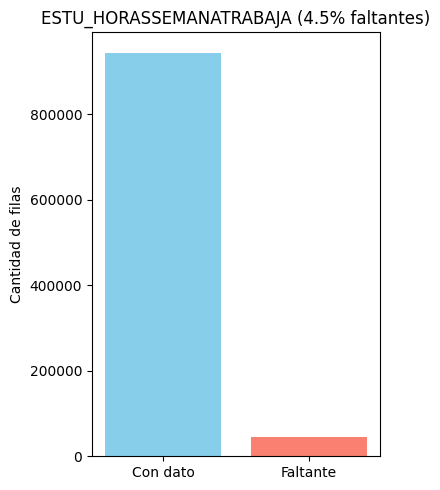

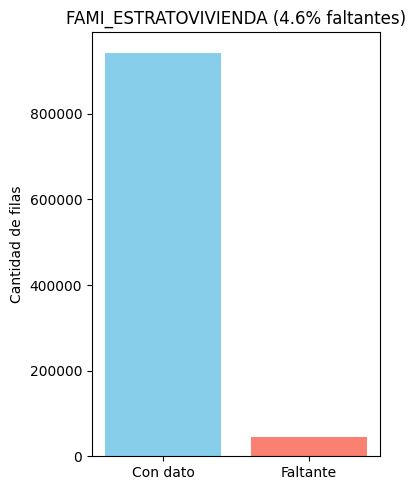

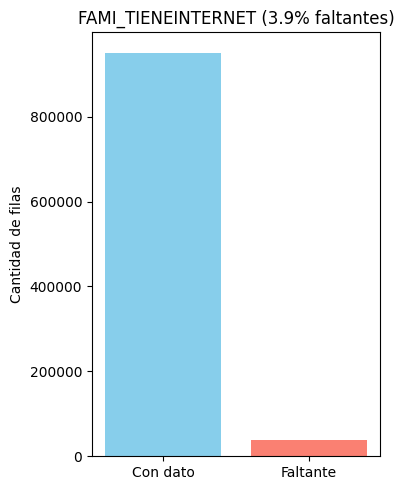

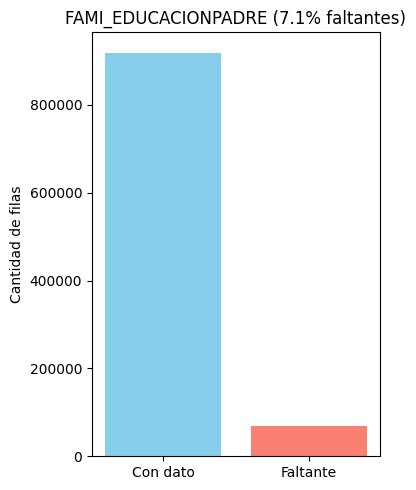

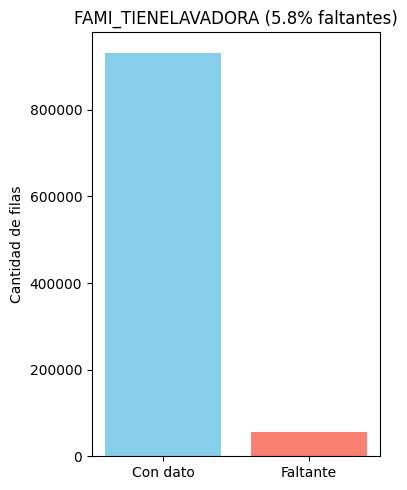

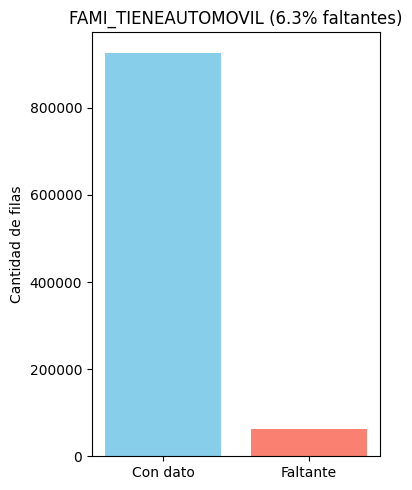

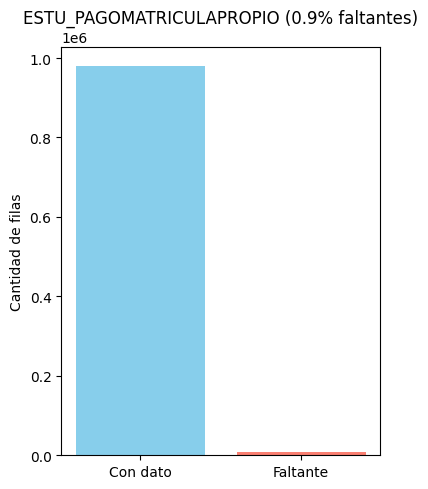

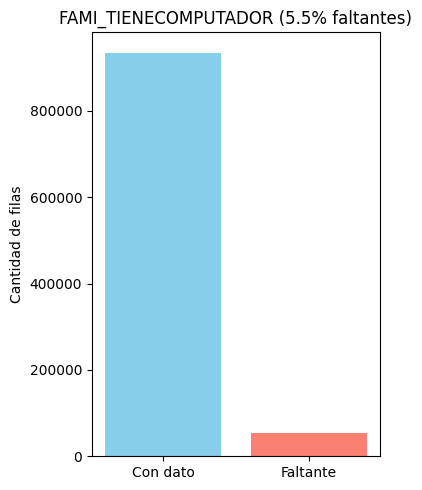

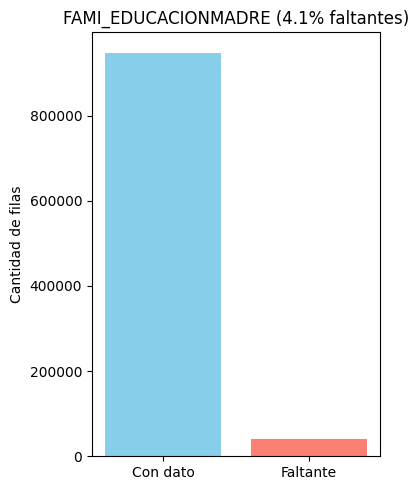

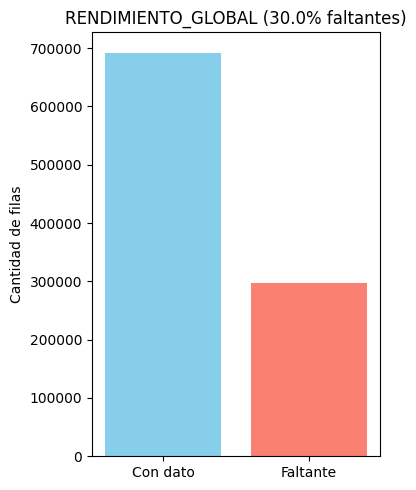

In [41]:
plot_nan_vs_notnull_individual(d)

## Imputación de valores faltantes ##

In [42]:
#Función a emplear 
import numpy as np

def rellenar_nan_balanceado_columna(df, columna, random_state=42):
    """
    Rellena valores faltantes de UNA columna categórica
    o de baja cardinalidad con sus valores únicos, balanceadamente.
    """
    df_copy = df.copy()
    
    rng = np.random.default_rng(random_state)
    
    if columna not in df_copy.columns:
        print(f"La columna {columna} no existe en el DataFrame")
        return df_copy
    
    # considera variable 'categórica' si tiene <=10 valores únicos
    if not (
        df_copy[columna].dtype == "object"
        or pd.api.types.is_categorical_dtype(df_copy[columna])
        or df_copy[columna].nunique(dropna=True) <= 10
    ):
        print(f"La columna {columna} no es categórica o de baja cardinalidad")
        return df_copy
    
    missing_idx = df_copy[df_copy[columna].isna()].index
    n_missing = len(missing_idx)
    
    if n_missing > 0:
        valores_unicos = df_copy[columna].dropna().unique()
        n_categorias = len(valores_unicos)
        
        if n_categorias == 0:
            print(f"No hay valores únicos en {columna}")
            return df_copy
        
        n_por_categoria = n_missing // n_categorias
        
        valores_para_rellenar = []
        for val in valores_unicos:
            valores_para_rellenar.extend([val] * n_por_categoria)
        
        while len(valores_para_rellenar) < n_missing:
            valores_para_rellenar.append(rng.choice(valores_unicos))
        
        rng.shuffle(valores_para_rellenar)
        
        df_copy.loc[missing_idx, columna] = valores_para_rellenar
        
    return df_copy


In [43]:
columnas = ['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_TIENELAVADORA',
            'FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TIENEAUTOMOVIL','ESTU_PAGOMATRICULAPROPIO','FAMI_TIENECOMPUTADOR']

for i in columnas:
    d = rellenar_nan_balanceado_columna(d, i)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12360\1870269210.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  or pd.api.types.is_categorical_dtype(df_copy[columna])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12360\1870269210.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  or pd.api.types.is_categorical_dtype(df_copy[columna])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12360\1870269210.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  or pd.api.types.is_categorical_dtype(df_copy[columna])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12360\1870269210.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd

In [44]:
d

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256    20212                  ENFERMERIA                 BOGOTA   
1       645256    20212                     DERECHO              ATLANTICO   
2       308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTA   
3       470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032    20212                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
989281  496981    20195  ADMINISTRACION DE EMPRESAS                 BOGOTA   
989282  209415    20183                     DERECHO                   META   
989283  239074    20212                     DERECHO                 BOGOTA   
989284  963852    20195      INGENIERIA AERONAUTICA              ANTIOQUIA   
989285  792650    20212       INGENIERIA INDUSTRIAL                 BOYACA   

        ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                                 6.25                      5.0   
1                                 3.25                      0.0   
2                                 3.25                     35.0   
3                                 4.75                      0.0   
4                                 3.25                     25.5   
...                                ...                      ...   
989281                            3.25                     35.0   
989282                            1.75                      0.0   
989283                            3.25                     35.0   
989284                            6.25                     15.5   
989285                            0.00                      0.0   

        FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                        3.0                 1.0                  5.0   
1                        3.0                 0.0                  6.0   
2                        3.0                 1.0                  4.0   
3                        4.0                 1.0                  9.0   
4                        3.0                 1.0                  2.0   
...                      ...                 ...                  ...   
989281                   1.0                 1.0                  1.0   
989282                   4.0                 1.0                  8.0   
989283                   3.0                 1.0                  4.0   
989284                   3.0                 1.0                  8.0   
989285                   3.0                 1.0                  4.0   

        FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  ESTU_PAGOMATRICULAPROPIO  \
0                      1.0                  1.0                       0.0   
1                      1.0                  0.0                       0.0   
2                      1.0                  0.0                       0.0   
3                      1.0                  0.0                       0.0   
4                      1.0                  1.0                       0.0   
...                    ...                  ...                       ...   
989281                 1.0                  1.0                       1.0   
989282                 1.0                  0.0                       0.0   
989283                 1.0                  0.0                       0.0   
989284                 1.0                  0.0                       0.0   
989285                 1.0                  1.0                       0.0   

        FAMI_TIENECOMPUTADOR  FAMI_EDUCACIONMADRE  RENDIMIENTO_GLOBAL  coef_1  \
0                        1.0                  9.0                 2.0   0.322   
1                        1.0                  5.0                 0.0   0.311   
2                        0.0                  4.0                 0.0   0.297   
3                        1.0                  4.0                 3.0   0.485   
4                        1.0                  2.0              

In [45]:
d.isna().sum()

ID                                     0
PERIODO                                0
ESTU_PRGM_ACADEMICO                    0
ESTU_PRGM_DEPARTAMENTO                 0
ESTU_VALORMATRICULAUNIVERSIDAD         0
ESTU_HORASSEMANATRABAJA                0
FAMI_ESTRATOVIVIENDA                   0
FAMI_TIENEINTERNET                     0
FAMI_EDUCACIONPADRE                    0
FAMI_TIENELAVADORA                     0
FAMI_TIENEAUTOMOVIL                    0
ESTU_PAGOMATRICULAPROPIO               0
FAMI_TIENECOMPUTADOR                   0
FAMI_EDUCACIONMADRE                    0
RENDIMIENTO_GLOBAL                296786
coef_1                                 0
coef_2                                 0
coef_3                                 0
coef_4                                 0
dtype: int64

## Convierte variables categóricas nominales en one hot enconding ##

In [46]:
#Las columnas que no tenian un orden marcado ('ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO') se aplicó ONEHOTENCODING
d_encoded = pd.get_dummies(d, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'])
d_encoded

ID  PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  \
0       904256    20212                            6.25   
1       645256    20212                            3.25   
2       308367    20203                            3.25   
3       470353    20195                            4.75   
4       989032    20212                            3.25   
...        ...      ...                             ...   
989281  496981    20195                            3.25   
989282  209415    20183                            1.75   
989283  239074    20212                            3.25   
989284  963852    20195                            6.25   
989285  792650    20212                            0.00   

        ESTU_HORASSEMANATRABAJA  FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  \
0                           5.0                   3.0                 1.0   
1                           0.0                   3.0                 0.0   
2                          35.0                   3.0                 1.0   
3                           0.0                   4.0                 1.0   
4                          25.5                   3.0                 1.0   
...                         ...                   ...                 ...   
989281                     35.0                   1.0                 1.0   
989282                      0.0                   4.0                 1.0   
989283                     35.0                   3.0                 1.0   
989284                     15.5                   3.0                 1.0   
989285                      0.0                   3.0                 1.0   

        FAMI_EDUCACIONPADRE  FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  \
0                       5.0                 1.0                  1.0   
1                       6.0                 1.0                  0.0   
2                       4.0                 1.0                  0.0   
3                       9.0                 1.0                  0.0   
4                       2.0                 1.0                  1.0   
...                     ...                 ...                  ...   
989281                  1.0                 1.0                  1.0   
989282                  8.0                 1.0                  0.0   
989283                  4.0                 1.0                  0.0   
989284                  8.0                 1.0                  0.0   
989285                  4.0                 1.0                  1.0   

        ESTU_PAGOMATRICULAPROPIO  ...  ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER  \
0                            0.0  ...                                   False   
1                            0.0  ...                                   False   
2                            0.0  ...                                   False   
3                            0.0  ...                                   False   
4                            0.0  ...                                   False   
...                          ...  ...                                     ...   
989281                       1.0  ...                                   False   
989282                       0.0  ...                                   False   
989283                       0.0  ...                                   False   
989284                       0.0  ...                                   False   
989285                       0.0  ...                                   False   

        ESTU_PRGM_DEPARTAMENTO_PUTUMAYO  ESTU_PRGM_DEPARTAMENTO_QUINDIO  \
0                                 False                           False   
1                                 False                           False   
2                                 False                           False   
3                                 False                           False   
4                                 False                           False   
...                                 ...                             ...   
989281         

In [47]:
periodos = d_encoded["PERIODO"].unique()

In [48]:
periodos 

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196])

Se pasa la columna PERIODO por un orden numérico de acuerdo al año en el que se presentó la prueba

 20183,  20184 -> 0 

 20195, 20194, 20196 -> 1

 20203, 20202 -> 2

 20212, 20213  -> 3

In [49]:
#Codificación de la columna periodo ->
d_encoded['PERIODO'] = d_encoded['PERIODO'].astype(str).str[:4].astype(int)
años_unicos = sorted(d_encoded['PERIODO'].unique())  # asegura el orden cronológico
diccionario_codificacion = {año: idx for idx, año in enumerate(años_unicos)}


d_encoded['PERIODO'] = d_encoded['PERIODO'].map(diccionario_codificacion)
d_encoded

ID  PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  \
0       904256        3                            6.25   
1       645256        3                            3.25   
2       308367        2                            3.25   
3       470353        1                            4.75   
4       989032        3                            3.25   
...        ...      ...                             ...   
989281  496981        1                            3.25   
989282  209415        0                            1.75   
989283  239074        3                            3.25   
989284  963852        1                            6.25   
989285  792650        3                            0.00   

        ESTU_HORASSEMANATRABAJA  FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  \
0                           5.0                   3.0                 1.0   
1                           0.0                   3.0                 0.0   
2                          35.0                   3.0                 1.0   
3                           0.0                   4.0                 1.0   
4                          25.5                   3.0                 1.0   
...                         ...                   ...                 ...   
989281                     35.0                   1.0                 1.0   
989282                      0.0                   4.0                 1.0   
989283                     35.0                   3.0                 1.0   
989284                     15.5                   3.0                 1.0   
989285                      0.0                   3.0                 1.0   

        FAMI_EDUCACIONPADRE  FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  \
0                       5.0                 1.0                  1.0   
1                       6.0                 1.0                  0.0   
2                       4.0                 1.0                  0.0   
3                       9.0                 1.0                  0.0   
4                       2.0                 1.0                  1.0   
...                     ...                 ...                  ...   
989281                  1.0                 1.0                  1.0   
989282                  8.0                 1.0                  0.0   
989283                  4.0                 1.0                  0.0   
989284                  8.0                 1.0                  0.0   
989285                  4.0                 1.0                  1.0   

        ESTU_PAGOMATRICULAPROPIO  ...  ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER  \
0                            0.0  ...                                   False   
1                            0.0  ...                                   False   
2                            0.0  ...                                   False   
3                            0.0  ...                                   False   
4                            0.0  ...                                   False   
...                          ...  ...                                     ...   
989281                       1.0  ...                                   False   
989282                       0.0  ...                                   False   
989283                       0.0  ...                                   False   
989284                       0.0  ...                                   False   
989285                       0.0  ...                                   False   

        ESTU_PRGM_DEPARTAMENTO_PUTUMAYO  ESTU_PRGM_DEPARTAMENTO_QUINDIO  \
0                                 False                           False   
1                                 False                           False   
2                                 False                           False   
3                                 False                           False   
4                                 False                           False   
...                                 ...                             ...   
989281         

In [50]:
d_encoded["ESTU_HORASSEMANATRABAJA"].value_counts() 

ESTU_HORASSEMANATRABAJA
35.0    364388
0.0     175819
15.5    174090
25.5    141471
5.0     133518
Name: count, dtype: int64

### SE COMPARAN DATAFRAME INICIAL (SIN LIMPIEZA) CON DATAFRAME PREPROCESADO

In [51]:
df.describe()

ID        PERIODO         coef_1         coef_2  \
count  989286.00000  989286.000000  989286.000000  989286.000000   
mean   494643.50000   20198.370398       0.268511       0.259994   
std    285582.41354      10.532246       0.121897       0.093816   
min         1.00000   20183.000000       0.000000       0.000000   
25%    247322.25000   20195.000000       0.204000       0.213000   
50%    494643.50000   20195.000000       0.241000       0.269000   
75%    741964.75000   20203.000000       0.313000       0.308000   
max    989286.00000   20213.000000       0.663000       0.487000   

              coef_3         coef_4  
count  989286.000000  989286.000000  
mean        0.262317       0.262767  
std         0.059096       0.067837  
min         0.000000       0.000000  
25%         0.254000       0.255000  
50%         0.277000       0.284000  
75%         0.294000       0.302000  
max         0.322000       0.332000

In [52]:
df.shape

(989286, 21)

In [53]:
df.isna().sum()

ID                                     0
PERIODO                                0
ESTU_PRGM_ACADEMICO                    0
ESTU_PRGM_DEPARTAMENTO                 0
ESTU_VALORMATRICULAUNIVERSIDAD      9010
ESTU_HORASSEMANATRABAJA            44236
FAMI_ESTRATOVIVIENDA               45932
FAMI_TIENEINTERNET                 38168
FAMI_EDUCACIONPADRE                33171
FAMI_TIENELAVADORA                 57032
FAMI_TIENEAUTOMOVIL                62541
ESTU_PRIVADO_LIBERTAD                  0
ESTU_PAGOMATRICULAPROPIO            9305
FAMI_TIENECOMPUTADOR               54542
FAMI_TIENEINTERNET.1               38168
FAMI_EDUCACIONMADRE                33887
RENDIMIENTO_GLOBAL                296786
coef_1                                 0
coef_2                                 0
coef_3                                 0
coef_4                                 0
dtype: int64

In [54]:
d_encoded.describe()

ID        PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  \
count  989286.00000  989286.000000                   989286.000000   
mean   494643.50000       1.509290                        2.868232   
std    285582.41354       1.106592                        2.362038   
min         1.00000       0.000000                        0.000000   
25%    247322.25000       1.000000                        0.750000   
50%    494643.50000       1.000000                        1.750000   
75%    741964.75000       2.000000                        4.750000   
max    989286.00000       3.000000                        8.000000   

       ESTU_HORASSEMANATRABAJA  FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  \
count            989286.000000         989286.000000       989286.000000   
mean                 19.940720              2.543958            0.875048   
std                  13.864249              1.182675            0.330664   
min                   0.000000              0.000000            0.000000   
25%                   5.000000              2.000000            1.000000   
50%                  25.500000              2.000000            1.000000   
75%                  35.000000              3.000000            1.000000   
max                  35.000000              6.000000            1.000000   

       FAMI_EDUCACIONPADRE  FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  \
count        989286.000000       989286.000000        989286.000000   
mean              4.231592            0.842498             0.372779   
std               2.717662            0.364274             0.483544   
min               0.000000            0.000000             0.000000   
25%               2.000000            1.000000             0.000000   
50%               4.000000            1.000000             0.000000   
75%               6.000000            1.000000             1.000000   
max               9.000000            1.000000             1.000000   

       ESTU_PAGOMATRICULAPROPIO  FAMI_TIENECOMPUTADOR  FAMI_EDUCACIONMADRE  \
count             989286.000000         989286.000000        989286.000000   
mean                   0.443313              0.890478             4.451132   
std                    0.496776              0.312294             2.590360   
min                    0.000000              0.000000             0.000000   
25%                    0.000000              1.000000             2.000000   
50%                    0.000000              1.000000             4.000000   
75%                    1.000000              1.000000             6.000000   
max                    1.000000              1.000000             9.000000   

       RENDIMIENTO_GLOBAL         coef_1         coef_2         coef_3  \
count       692500.000000  989286.000000  989286.000000  989286.000000   
mean             1.505227       0.268511       0.259994       0.262317   
std              1.121061       0.121897       0.093816       0.059096   
min              0.000000       0.000000       0.000000       0.000000   
25%              1.000000       0.204000       0.213000       0.254000   
50%              2.000000       0.241000       0.269000       0.277000   
75%              3.000000       0.313000       0.308000       0.294000   
max              3.000000       0.663000       0.487000       0.322000   

              coef_4  
count  989286.000000  
mean        0.262767  
std         0.067837  
min         0.000000  
25%         0.255000  
50%         0.284000  
75%         0.302000  
max         0.332000

In [55]:
d_encoded.shape

(989286, 843)

In [56]:
d_encoded.isna().sum()

ID                                  0
PERIODO                             0
ESTU_VALORMATRICULAUNIVERSIDAD      0
ESTU_HORASSEMANATRABAJA             0
FAMI_ESTRATOVIVIENDA                0
                                   ..
ESTU_PRGM_DEPARTAMENTO_SANTANDER    0
ESTU_PRGM_DEPARTAMENTO_SUCRE        0
ESTU_PRGM_DEPARTAMENTO_TOLIMA       0
ESTU_PRGM_DEPARTAMENTO_VALLE        0
ESTU_PRGM_DEPARTAMENTO_VAUPES       0
Length: 843, dtype: int64

In [57]:
d_encoded["RENDIMIENTO_GLOBAL"].unique()

array([ 2.,  0.,  3.,  1., nan])

## Se separan los dataframes ##

--> Train limpio

--> Test limpio 

In [58]:
df_train_limpio = d_encoded.iloc[:len(df_train)] # Separo el dataframe de "train"
df_test_limpio = d_encoded.iloc[len(df_train):] # Separo el dataframe de "test"

In [59]:
df_train_limpio

ID  PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  \
0       904256        3                            6.25   
1       645256        3                            3.25   
2       308367        2                            3.25   
3       470353        1                            4.75   
4       989032        3                            3.25   
...        ...      ...                             ...   
692495   25096        1                            0.75   
692496  754213        3                            3.25   
692497  504185        0                            1.75   
692498  986620        1                            3.25   
692499  933374        1                            6.25   

        ESTU_HORASSEMANATRABAJA  FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  \
0                           5.0                   3.0                 1.0   
1                           0.0                   3.0                 0.0   
2                          35.0                   3.0                 1.0   
3                           0.0                   4.0                 1.0   
4                          25.5                   3.0                 1.0   
...                         ...                   ...                 ...   
692495                     15.5                   2.0                 1.0   
692496                     35.0                   3.0                 1.0   
692497                      5.0                   3.0                 1.0   
692498                      5.0                   1.0                 0.0   
692499                     35.0                   4.0                 1.0   

        FAMI_EDUCACIONPADRE  FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  \
0                       5.0                 1.0                  1.0   
1                       6.0                 1.0                  0.0   
2                       4.0                 1.0                  0.0   
3                       9.0                 1.0                  0.0   
4                       2.0                 1.0                  1.0   
...                     ...                 ...                  ...   
692495                  4.0                 1.0                  0.0   
692496                  1.0                 1.0                  0.0   
692497                  4.0                 1.0                  0.0   
692498                  2.0                 0.0                  0.0   
692499                  4.0                 1.0                  1.0   

        ESTU_PAGOMATRICULAPROPIO  ...  ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER  \
0                            0.0  ...                                   False   
1                            0.0  ...                                   False   
2                            0.0  ...                                   False   
3                            0.0  ...                                   False   
4                            0.0  ...                                   False   
...                          ...  ...                                     ...   
692495                       1.0  ...                                   False   
692496                       0.0  ...                                    True   
692497                       1.0  ...                                   False   
692498                       1.0  ...                                   False   
692499                       0.0  ...                                   False   

        ESTU_PRGM_DEPARTAMENTO_PUTUMAYO  ESTU_PRGM_DEPARTAMENTO_QUINDIO  \
0                                 False                           False   
1                                 False                           False   
2                                 False                           False   
3                                 False                           False   
4                                 False                           False   
...                                 ...                             ...   
692495         

In [60]:
df_test_limpio

ID  PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  \
692500  550236        0                            0.25   
692501   98545        2                            3.25   
692502  499179        3                            1.75   
692503  782980        1                            1.75   
692504  785185        3                            3.25   
...        ...      ...                             ...   
989281  496981        1                            3.25   
989282  209415        0                            1.75   
989283  239074        3                            3.25   
989284  963852        1                            6.25   
989285  792650        3                            0.00   

        ESTU_HORASSEMANATRABAJA  FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  \
692500                      5.0                   3.0                 1.0   
692501                     25.5                   2.0                 1.0   
692502                      0.0                   3.0                 1.0   
692503                     25.5                   1.0                 0.0   
692504                     15.5                   2.0                 1.0   
...                         ...                   ...                 ...   
989281                     35.0                   1.0                 1.0   
989282                      0.0                   4.0                 1.0   
989283                     35.0                   3.0                 1.0   
989284                     15.5                   3.0                 1.0   
989285                      0.0                   3.0                 1.0   

        FAMI_EDUCACIONPADRE  FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  \
692500                  6.0                 1.0                  0.0   
692501                  4.0                 1.0                  0.0   
692502                  3.0                 1.0                  0.0   
692503                  1.0                 1.0                  0.0   
692504                  4.0                 1.0                  0.0   
...                     ...                 ...                  ...   
989281                  1.0                 1.0                  1.0   
989282                  8.0                 1.0                  0.0   
989283                  4.0                 1.0                  0.0   
989284                  8.0                 1.0                  0.0   
989285                  4.0                 1.0                  1.0   

        ESTU_PAGOMATRICULAPROPIO  ...  ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER  \
692500                       1.0  ...                                   False   
692501                       0.0  ...                                   False   
692502                       0.0  ...                                   False   
692503                       0.0  ...                                   False   
692504                       0.0  ...                                   False   
...                          ...  ...                                     ...   
989281                       1.0  ...                                   False   
989282                       0.0  ...                                   False   
989283                       0.0  ...                                   False   
989284                       0.0  ...                                   False   
989285                       0.0  ...                                   False   

        ESTU_PRGM_DEPARTAMENTO_PUTUMAYO  ESTU_PRGM_DEPARTAMENTO_QUINDIO  \
692500                            False                           False   
692501                            False                           False   
692502                            False                           False   
692503                            False                           False   
692504                            False                           False   
...                                 ...                             ...   
989281         

In [61]:
#Elimino columnas no necesarias en cada dataframe
df_test_limpio.drop('RENDIMIENTO_GLOBAL', axis = 1, inplace = True)
df_train_limpio.drop('ID',axis=1,inplace = True)

df_test_limpio_copy = df_test_limpio.copy()
df_test_limpio.drop('ID',axis=1,inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12360\2093719228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_limpio.drop('RENDIMIENTO_GLOBAL', axis = 1, inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12360\2093719228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_limpio.drop('ID',axis=1,inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12360\2093719228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

## __APLICACIÓN DEL MODELO__ ##

### Librerias a utilizar para entrenar el modelo ###

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

In [63]:
#Separo los datos de entreno y de validación 
X = df_train_limpio.drop(columns='RENDIMIENTO_GLOBAL').values
y = df_train_limpio["RENDIMIENTO_GLOBAL"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  

### __Entreno del modelo__ ###

__Prueba 1:__ n_estimators=100 max_depth=15 - Presenta muy buenos resultados 

__Accuracy:__ 0.4292707581227437

__Tiempo:__ 30s

In [64]:
modelo = LGBMClassifier(
    n_estimators=100,
    max_depth=15,
    subsample=0.6,          # Usa solo el 60% de los datos por árbol
    colsample_bytree=0.8,   # Usa el 80% de las columnas por árbol
    random_state=42,
    n_jobs=-1              # Paraleliza en todos los núcleos
)
modelo.fit(X_train, y_train)

# Se predice con el set de validación
y_pred = modelo.predict(X_val)
ypreds_tr = modelo.predict(X_train)

# Evaluar el rendimiento
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Reporte de clasificación:\n", classification_report(y_val, y_pred))
print('\n Accuracy para train y test')

np.mean(y_train == ypreds_tr), np.mean(y_val == y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2317
[LightGBM] [Info] Number of data points in the train set: 554000, number of used features: 698
[LightGBM] [Info] Start training from score -1.387089
[LightGBM] [Info] Start training from score -1.391216
[LightGBM] [Info] Start training from score -1.395033
[LightGBM] [Info] Start training from score -1.371993


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.4292707581227437
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.45      0.57      0.50     34597
         1.0       0.33      0.27      0.30     34455
         2.0       0.33      0.25      0.28     34324
         3.0       0.54      0.62      0.58     35124

    accuracy                           0.43    138500
   macro avg       0.41      0.43      0.42    138500
weighted avg       0.41      0.43      0.42    138500


 Accuracy para train y test


(np.float64(0.4369945848375451), np.float64(0.4292707581227437))

## __Modelo empleado__ ##

In [65]:
# Se demora aprox 1m
modelo = LGBMClassifier(
    n_estimators=500,
    max_depth=15,
    subsample=0.8,          # Usa solo el 80% de los datos por árbol
    colsample_bytree=0.8,   # Usa el 80% de las columnas por árbol
    random_state=42,
    n_jobs=-1              
)
modelo.fit(X_train, y_train)

# Se predice con el set de validación
y_pred = modelo.predict(X_val)
ypreds_tr = modelo.predict(X_train)

# Evaluar el rendimiento
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Reporte de clasificación:\n", classification_report(y_val, y_pred))
print('\n Accuracy para train y test')

np.mean(y_train == ypreds_tr), np.mean(y_val == y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2317
[LightGBM] [Info] Number of data points in the train set: 554000, number of used features: 698
[LightGBM] [Info] Start training from score -1.387089
[LightGBM] [Info] Start training from score -1.391216
[LightGBM] [Info] Start training from score -1.395033
[LightGBM] [Info] Start training from score -1.371993


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.4356245487364621
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.46      0.58      0.51     34597
         1.0       0.33      0.27      0.30     34455
         2.0       0.33      0.26      0.29     34324
         3.0       0.56      0.63      0.59     35124

    accuracy                           0.44    138500
   macro avg       0.42      0.43      0.42    138500
weighted avg       0.42      0.44      0.42    138500


 Accuracy para train y test


(np.float64(0.46487906137184115), np.float64(0.4356245487364621))

In [66]:
#Predicciones del modelo
predicciones_test = modelo.predict(df_test_limpio)
predicciones_test

array([0., 2., 3., ..., 2., 3., 3.], shape=(296786,))

## __Vuelvo a las variables originales de la columna 'RENDIMIENTO_GLOBAL'__ ##

In [67]:
#Variables 
orden = {0:'bajo', 1: 'medio-bajo', 2: 'medio-alto', 3: 'alto'}

# Vectorizar el diccionario
map_func = np.vectorize(orden.get)

# Aplicar la función al array
predicciones_texto = map_func(predicciones_test)

In [68]:
predicciones_texto

array(['bajo', 'medio-alto', 'alto', ..., 'medio-alto', 'alto', 'alto'],
      shape=(296786,), dtype='<U10')

## Se genera el dataframe de las predicciones ##

In [69]:
#Creo el nuevo Dataframe para pasar a Kaggle
nuevo_df = pd.DataFrame(df_test_limpio_copy['ID']).reset_index(drop=True)
nuevo_df['RENDIMIENTO_GLOBAL'] = predicciones_texto
nuevo_df.tail

<bound method NDFrame.tail of             ID RENDIMIENTO_GLOBAL
0       550236               bajo
1        98545         medio-alto
2       499179               alto
3       782980               bajo
4       785185               bajo
...        ...                ...
296781  496981         medio-bajo
296782  209415               alto
296783  239074         medio-alto
296784  963852               alto
296785  792650               alto

[296786 rows x 2 columns]>

In [70]:
#Descargo el archivo en mi computador
#nuevo_df.to_csv('submission_file_LGBMClassifier_500.csv',index = False)